In [1]:
import matplotlib.pyplot as plt

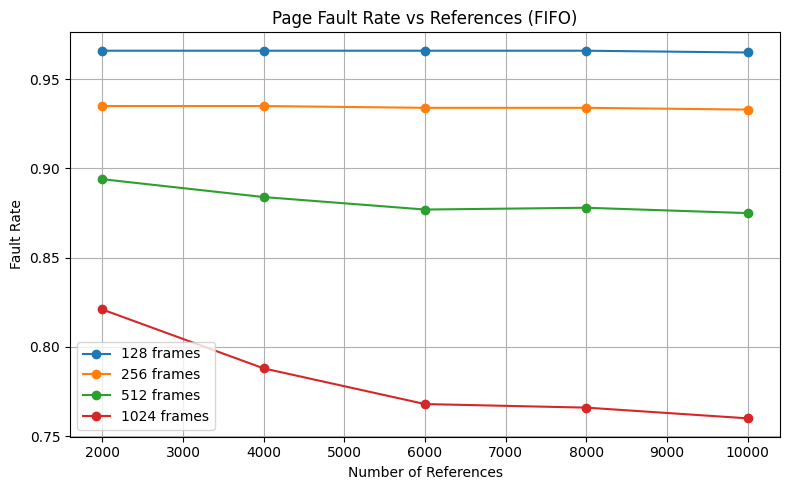

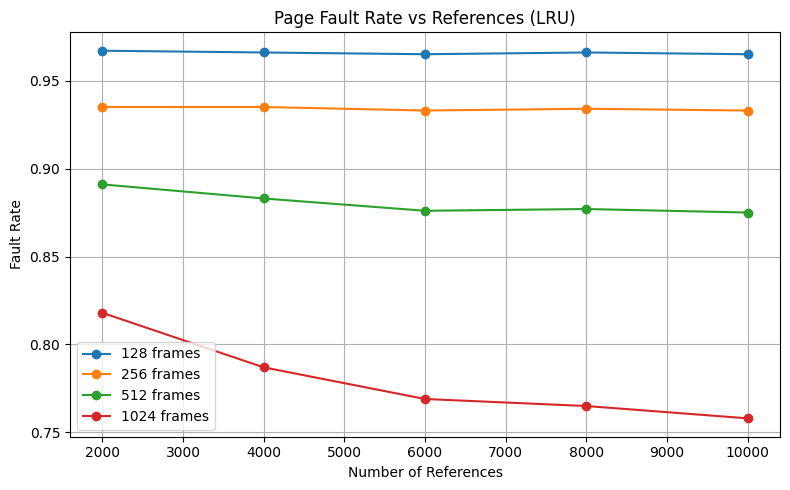

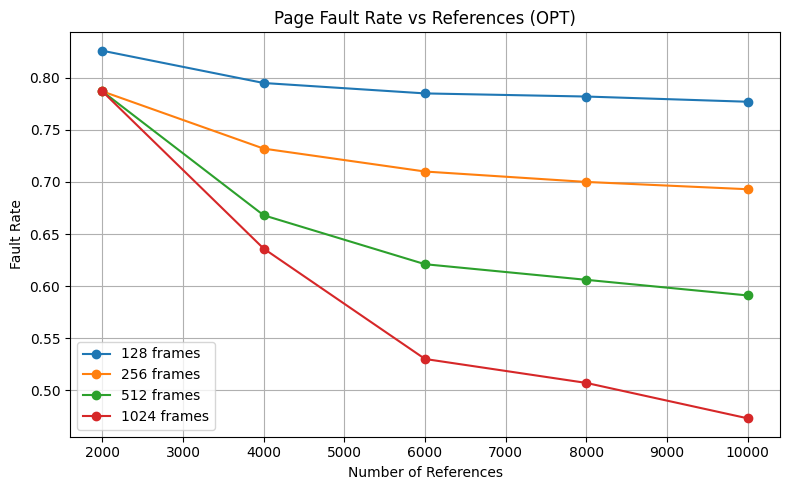

In [2]:

frame_sizes = [128, 256, 512, 1024]
files = {
    128: "out_128.txt",
    256: "out_256.txt",
    512: "out_512.txt",
    1024: "out_1024.txt",
}

algorithms = ["FIFO", "LRU", "OPT"]
checkpoints = [2000, 4000, 6000, 8000, 10000]

rates = {alg: {F: None for F in frame_sizes} for alg in algorithms}

def parse_output_file(path):
    """
    Parse one out_XXX.txt file.
    Returns dict: alg_name -> list of 5 fault rates [r2000, r4000, r6000, r8000, r10000]
    """
    result = {}
    with open(path, "r") as f:
        for line in f:
            stripped = line.strip()
            if not stripped:
                continue
            for alg in algorithms:
                if stripped.startswith(alg):
                    parts = stripped.split()
                    if len(parts) < 7:
                        raise ValueError(
                            f"Unexpected format in {path} for {alg} line: {stripped}"
                        )
                    r2000 = float(parts[2])
                    r4000 = float(parts[3])
                    r6000 = float(parts[4])
                    r8000 = float(parts[5])
                    r10000 = float(parts[6])
                    result[alg] = [r2000, r4000, r6000, r8000, r10000]
                    break
    return result

for F in frame_sizes:
    path = files[F]
    parsed = parse_output_file(path)
    for alg in algorithms:
        if alg not in parsed:
            raise ValueError(f"Algorithm {alg} not found in file {path}")
        rates[alg][F] = parsed[alg]

for alg in algorithms:
    plt.figure(figsize=(8, 5))
    for F in frame_sizes:
        y = rates[alg][F]
        plt.plot(checkpoints, y, marker="o", label=f"{F} frames")

    plt.title(f"Page Fault Rate vs References ({alg})")
    plt.xlabel("Number of References")
    plt.ylabel("Fault Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"fault_rates_{alg}.png")

plt.show()
